In [13]:
from collections import Counter
from models.emotion_classifier import predict_emotions
import matplotlib.pyplot as plt
import pandas as pd
import os

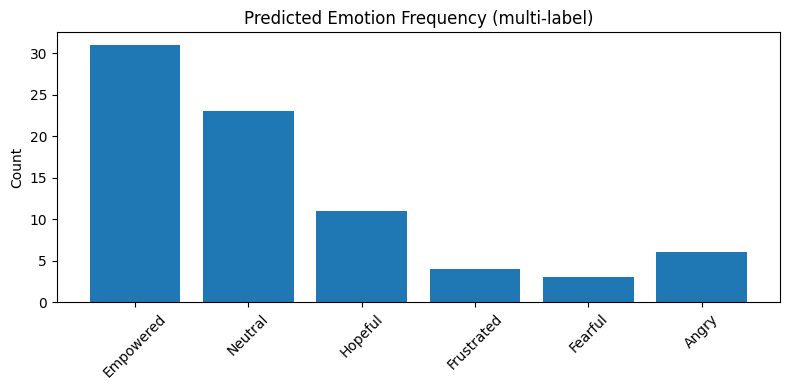

In [14]:
# Resolve the correct path from notebooks/
BASE_DIR = os.path.abspath("..")
DATA_PATH = os.path.join(BASE_DIR, "data", "custom_emotion_dataset", "hopeful_samples.csv")

# Load the dataset
df = pd.read_csv(DATA_PATH)
df['predicted_emotions'] = df['text'].apply(lambda x: ','.join(predict_emotions(x)))
df.to_csv(DATA_PATH, index=False)

# Count predicted emotions (assumes string format like "Angry,Neutral")
all_preds = []
for row in df['predicted_emotions']:
    all_preds.extend([e.strip() for e in row.split(',')])  # strip spaces

counter = Counter(all_preds)

# Plot
plt.figure(figsize=(8, 4))
plt.bar(counter.keys(), counter.values())
plt.xticks(rotation=45)
plt.title("Predicted Emotion Frequency (multi-label)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()